## Obtaining maximum cooling intensity as a function of current LST

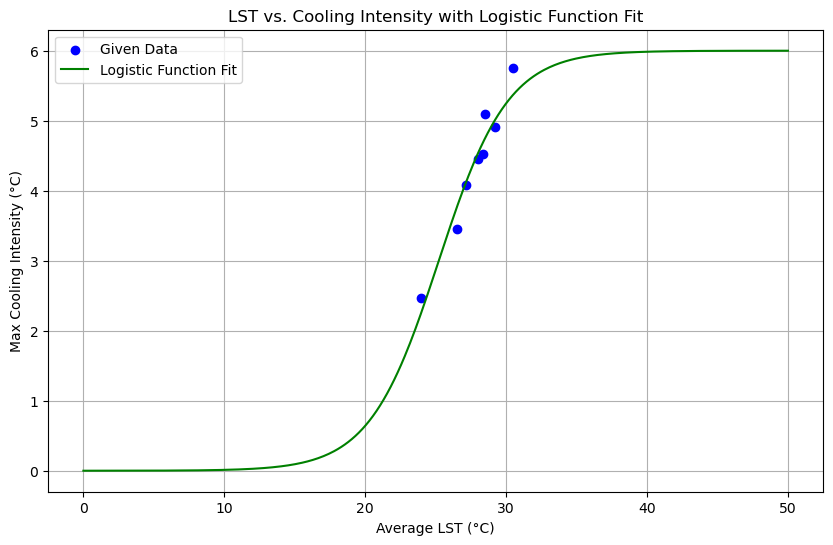

Optimized parameters [k, x0]: [ 0.40637096 25.22197827]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

lst = np.array([23.96, 26.55, 27.16, 28.03, 28.34, 28.52, 29.21, 30.52])
cooling_intensity = np.array([2.47, 3.46, 4.08, 4.45, 4.53, 5.10, 4.91, 5.75])

def logistic_func(x, k, x0):
    L = 6  
    return L / (1 + np.exp(-k * (x - x0)))

popt_logistic, _ = curve_fit(logistic_func, lst, cooling_intensity, p0=[0.1, 25])
x_values_logistic = np.linspace(0, 50, 400)

y_values_logistic = logistic_func(x_values_logistic, *popt_logistic)

plt.figure(figsize=(10, 6))
plt.scatter(lst, cooling_intensity, color='blue', label='Given Data')

plt.plot(x_values_logistic, y_values_logistic, color='green', label='Logistic Function Fit')

plt.xlabel('Average LST (°C)')
plt.ylabel('Max Cooling Intensity (°C)')
plt.title('LST vs. Cooling Intensity with Logistic Function Fit')
plt.legend()
plt.grid(True)

plt.show()

print("Optimized parameters [k, x0]:", popt_logistic)


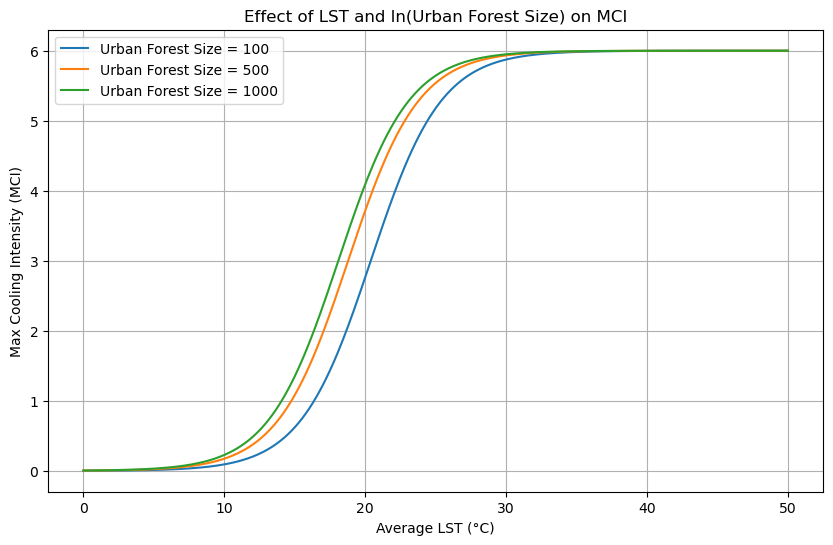

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def adjusted_logistic_func(x, S, k=0.4, x0=25, alpha=1):
    L = 6  
    return L / (1 + np.exp(-k * (x - (x0 - alpha * np.log(S)))))

S_values = np.array([100, 500, 1000])

x_values = np.linspace(0, 50, 400)

plt.figure(figsize=(10, 6))
for S in S_values:
    y_values = adjusted_logistic_func(x_values, S)
    plt.plot(x_values, y_values, label=f'Urban Forest Size = {S}')

plt.xlabel('Average LST (°C)')
plt.ylabel('Max Cooling Intensity (MCI)')
plt.title('Effect of LST and ln(Urban Forest Size) on MCI')
plt.legend()
plt.grid(True)
plt.show()


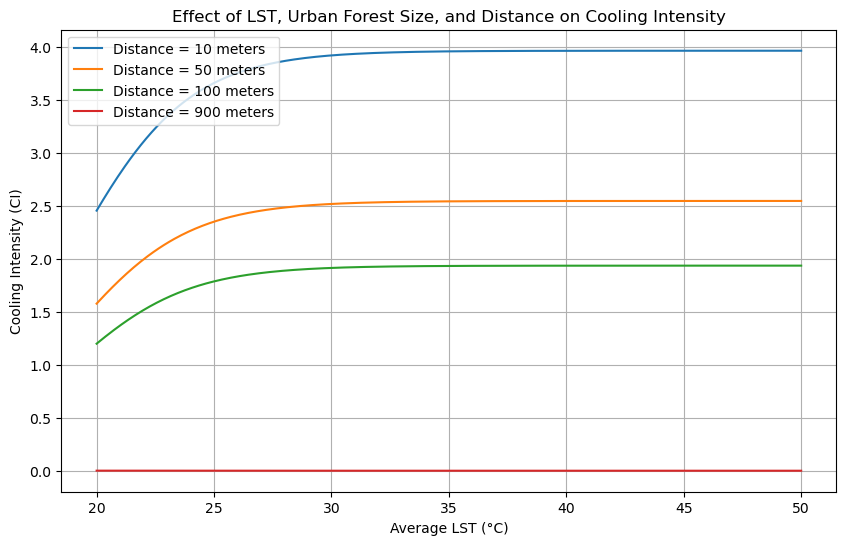

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def cooling_intensity(x, S, d, k=0.4, x0=25, alpha=1):
    L = 6  
    MCI = L / (1 + np.exp(-k * (x - (x0 - alpha * np.log(S)))))
    distance_effect = (5.76 - 0.847 * np.log(d))/5.76
    return MCI * distance_effect

S = 500 
d_values = np.array([10, 50, 100,900])  
x_values = np.linspace(20, 50, 400)

plt.figure(figsize=(10, 6))
for d in d_values:
    CI_values = cooling_intensity(x_values, S, d)
    plt.plot(x_values, CI_values, label=f'Distance = {d} meters')

plt.xlabel('Average LST (°C)')
plt.ylabel('Cooling Intensity (CI)')
plt.title('Effect of LST, Urban Forest Size, and Distance on Cooling Intensity')
plt.legend()
plt.grid(True)
plt.show()


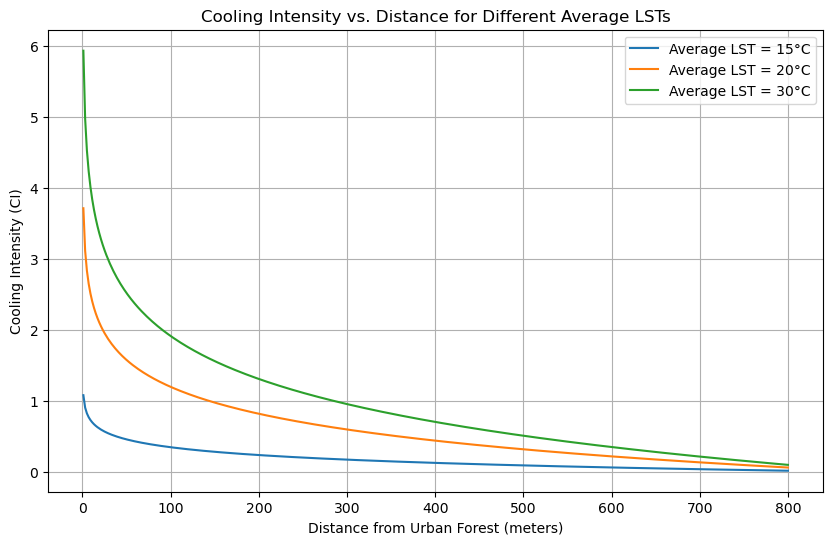

In [17]:
import numpy as np
import matplotlib.pyplot as plt

S = 500

d_values = np.linspace(1, 800, 400)

lst_values = [15,20,30]

plt.figure(figsize=(10, 6))
for lst in lst_values:
    CI_values = cooling_intensity(lst, S, d_values)
    plt.plot(d_values, CI_values, label=f'Average LST = {lst}°C')

plt.xlabel('Distance from Urban Forest (meters)')
plt.ylabel('Cooling Intensity (CI)')
plt.title('Cooling Intensity vs. Distance for Different Average LSTs')
plt.legend()
plt.grid(True)
plt.show()


The Cooling Intensity (CI) at a given point, considering the effects of Land Surface Temperature (LST, \\(x\\)), size of the urban forest (\\(S\\)), and distance from the urban forest (\\(d\\)), is given by:

\\[
\begin{align*}
CI(x, S, d) = \left( \frac{6}{1 + e^{-k (x - x_0 + \alpha \ln(S))}} \right)                                       \left(1 - \frac{0.847}{5.76}\ln(d) \right)
\end{align*}
\\]


Where:
- \\(CI\\) is the Cooling Intensity at the given point.
- \\(x\\) is the Land Surface Temperature at that point.
- \\(S\\) is the size of the urban forest.
- \\(d\\) is the distance from the urban forest.
- \\(k\\), \\(x_0\\), and alpha are parameters determined through fitting the model to data in research paper:
  - \\(k\\) influences the steepness of the logistic function.
  - \\(x_0\\) shifts the curve along the LST axis, determining the temperature at which the cooling effect becomes significant.
  - alpha adjusts the influence of the urban forest size (\\(S\\)) on the maximum Cooling Intensity.


In [56]:
def cooling_intensity(x, S, d, k=0.4, x0=25, alpha=1):
    L = 6  
    MCI = L / (1 + np.exp(-k * (x - (x0 - alpha * np.log(S)))))
    distance_effect = (5.76 - 0.847 * np.log(d))/5.76
    return MCI * distance_effect

In [57]:
cooling_intensity(30,100,50,alpha=1)

2.4949402380573096

In [58]:
cooling_intensity(30,500,50,alpha=1)

2.52006022029577

In [59]:
cooling_intensity(30,1000,50,alpha=1)

2.5268774957094244